In [1]:
import numpy as np
import scipy.io as scio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import seaborn as sns
import cartopy
import matplotlib
from cartopy.util import add_cyclic_point

def central_transform(data2D):
    data2D_new=np.full((360,180),np.nan)
    data2D_new[180:361,:]=data2D[20:200,:]
    data2D_new[0:160,:]=data2D[200:360,:]
    data2D_new[160:180,:]=data2D[0:20,:]
    return data2D_new

In [2]:
data=scio.loadmat('./Input_data/magnitude_upper2001000_T.mat')
lon=data['lon'][:]
lat=data['lat'][:]

data=np.load('./Input_data/Magnitude_low_medium_high_flag_upper200.npz')
magnitude_200_T_flag = data['magnitude_200_T_flag']
magnitude_200_S_flag = data['magnitude_200_S_flag']
magnitude_200_DO_flag = data['magnitude_200_DO_flag']
magnitude_overlap_200_T_S_flag = data['magnitude_overlap_200_T_S_flag']
magnitude_overlap_200_T_DO_flag = data['magnitude_overlap_200_T_DO_flag']
magnitude_overlap_200_T_S_DO_flag = data['magnitude_overlap_200_T_S_DO_flag']

data=np.load('./Input_data/Intensity_low_medium_high_flag_upper200.npz')
intensity_200_T_flag = data['intensity_200_T_flag']
intensity_200_S_flag = data['intensity_200_S_flag']
intensity_200_DO_flag = data['intensity_200_DO_flag']
intensity_overlap_200_T_S_flag = data['intensity_overlap_T_S_flag']
intensity_overlap_200_T_DO_flag = data['intensity_overlap_T_DO_flag']
intensity_overlap_200_T_S_DO_flag = data['intensity_overlap_T_S_DO_flag']

data=np.load('./Input_data/Duration_low_medium_high_flag_upper200.npz')
duration_200_T_flag = data['duration_200_T_flag']
duration_200_S_flag = data['duration_200_S_flag']
duration_200_DO_flag = data['duration_200_DO_flag']
duration_overlap_200_T_S_flag = data['duration_overlap_200_T_S_flag']
duration_overlap_200_T_DO_flag = data['duration_overlap_200_T_DO_flag']
duration_overlap_200_T_S_DO_flag = data['duration_overlap_200_T_S_DO_flag']

In [3]:
### define high/medium/low exposure for each variables
exposure_T_flag = np.full((360, 180),np.nan)
exposure_S_flag = np.full((360, 180),np.nan)
exposure_DO_flag = np.full((360, 180),np.nan)
exposure_T_S_flag = np.full((360, 180),np.nan)
exposure_T_DO_flag = np.full((360, 180),np.nan)
exposure_T_S_DO_flag = np.full((360, 180),np.nan)
for i in range(360):
    for j in range(180):
        if(~np.isnan(magnitude_200_T_flag[i,j])):
            data=np.array([magnitude_200_T_flag[i,j],intensity_200_T_flag[i,j],duration_200_T_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):  ### high exposure: at least two parameter shows 'high'=3
                exposure_T_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_T_flag[i,j]=1
            else:
                exposure_T_flag[i,j]=2 #other cases: medium exposure

        if(~np.isnan(magnitude_200_S_flag[i,j])):
            data=np.array([magnitude_200_S_flag[i,j],intensity_200_S_flag[i,j],duration_200_S_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):
                exposure_S_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_S_flag[i,j]=1
            else:
                exposure_S_flag[i,j]=2 #other cases: medium exposure

        if(~np.isnan(magnitude_200_DO_flag[i,j])):
            data=np.array([magnitude_200_DO_flag[i,j],intensity_200_DO_flag[i,j],duration_200_DO_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):
                exposure_DO_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_DO_flag[i,j]=1
            else:
                exposure_DO_flag[i,j]=2 #other cases: medium exposure
                
        if(~np.isnan(magnitude_overlap_200_T_S_flag[i,j])):
            data=np.array([magnitude_overlap_200_T_S_flag[i,j],intensity_overlap_200_T_S_flag[i,j],duration_overlap_200_T_S_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):
                exposure_T_S_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_T_S_flag[i,j]=1
            else:
                exposure_T_S_flag[i,j]=2 #other cases: medium exposure
                
        if(~np.isnan(magnitude_overlap_200_T_DO_flag[i,j])):
            data=np.array([magnitude_overlap_200_T_DO_flag[i,j],intensity_overlap_200_T_DO_flag[i,j],duration_overlap_200_T_DO_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):
                exposure_T_DO_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_T_DO_flag[i,j]=1
            else:
                exposure_T_DO_flag[i,j]=2 #other cases: medium exposure
                
        if(~np.isnan(magnitude_overlap_200_T_S_DO_flag[i,j])):
            data=np.array([magnitude_overlap_200_T_S_DO_flag[i,j],intensity_overlap_200_T_S_DO_flag[i,j],duration_overlap_200_T_S_DO_flag[i,j]])
            if(np.all(np.isnan(data))):
                continue
            if(np.sum(data==3)>=2):
                exposure_T_S_DO_flag[i,j]=3
            elif(np.sum(data==1)>=2):  # low exposure: at least two parameter shows 'low'
                exposure_T_S_DO_flag[i,j]=1
            else:
                exposure_T_S_DO_flag[i,j]=2 #other cases: medium exposure

#### transform the data projection central longitude
exposure_T_flag=central_transform(exposure_T_flag)
exposure_S_flag=central_transform(exposure_S_flag)
exposure_DO_flag=central_transform(exposure_DO_flag)
exposure_T_S_flag=central_transform(exposure_T_S_flag)
exposure_T_DO_flag=central_transform(exposure_T_DO_flag)
exposure_T_S_DO_flag=central_transform(exposure_T_S_DO_flag)
                
exposure_T_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_T_flag),np.transpose(lon)[0])
exposure_S_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_S_flag),np.transpose(lon)[0])
exposure_DO_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_DO_flag),np.transpose(lon)[0])
exposure_T_S_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_T_S_flag),np.transpose(lon)[0])
exposure_T_DO_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_T_DO_flag),np.transpose(lon)[0])
exposure_T_S_DO_flag, cycle_lon = add_cyclic_point(np.transpose(exposure_T_S_DO_flag),np.transpose(lon)[0])

In [4]:
######### create customize colorbars
white=(1,1,1)

# sns.palplot(sns.color_palette('Reds',6))
reds=sns.color_palette('Reds',6)
reds=[white,reds[0],reds[2]]
new_reds=matplotlib.colors.ListedColormap(reds,name='new_reds')  #only T 

# sns.palplot(sns.color_palette('binary',6))
whites=sns.color_palette('binary',6)
whites=[white,whites[1],whites[3]]
new_whites=matplotlib.colors.ListedColormap(whites,name='new_whites')  # only S 
# sns.palplot(whites)

# sns.palplot(sns.color_palette('Purples_r',16))
purples=sns.color_palette('Purples_r',16)
purples=[white,purples[6],purples[0]]  
new_purples=matplotlib.colors.ListedColormap(purples,name='new_purples')  #### only DO 
# sns.palplot(purples)

# sns.palplot(sns.color_palette('YlOrBr',8))
oranges=sns.color_palette('YlOrBr',8)
oranges=[white,oranges[3],oranges[5]]
new_oranges=matplotlib.colors.ListedColormap(oranges,name='new_oranges')  #T+S  oranges
# sns.palplot(oranges)

# sns.palplot(sns.color_palette('YlGn_r',12))
dark_green=sns.color_palette('YlGn_r',12)
dark_greens=[white,dark_green[3],dark_green[0]]  
new_dark_greens=matplotlib.colors.ListedColormap(dark_greens,name='new_dark_greens')  #T+S+DO  dark green
# sns.palplot(dark_greens)

# sns.palplot(sns.color_palette('YlGn_r',12))
light_green=sns.color_palette('YlGn_r',12)
light_green=[white,light_green[8],light_green[6]]  
new_light_greens=matplotlib.colors.ListedColormap(light_green,name='new_light_greens')  #T+DO  light green

D:\anaconda3\envs\myenv2\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\anaconda3\envs\myenv2\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


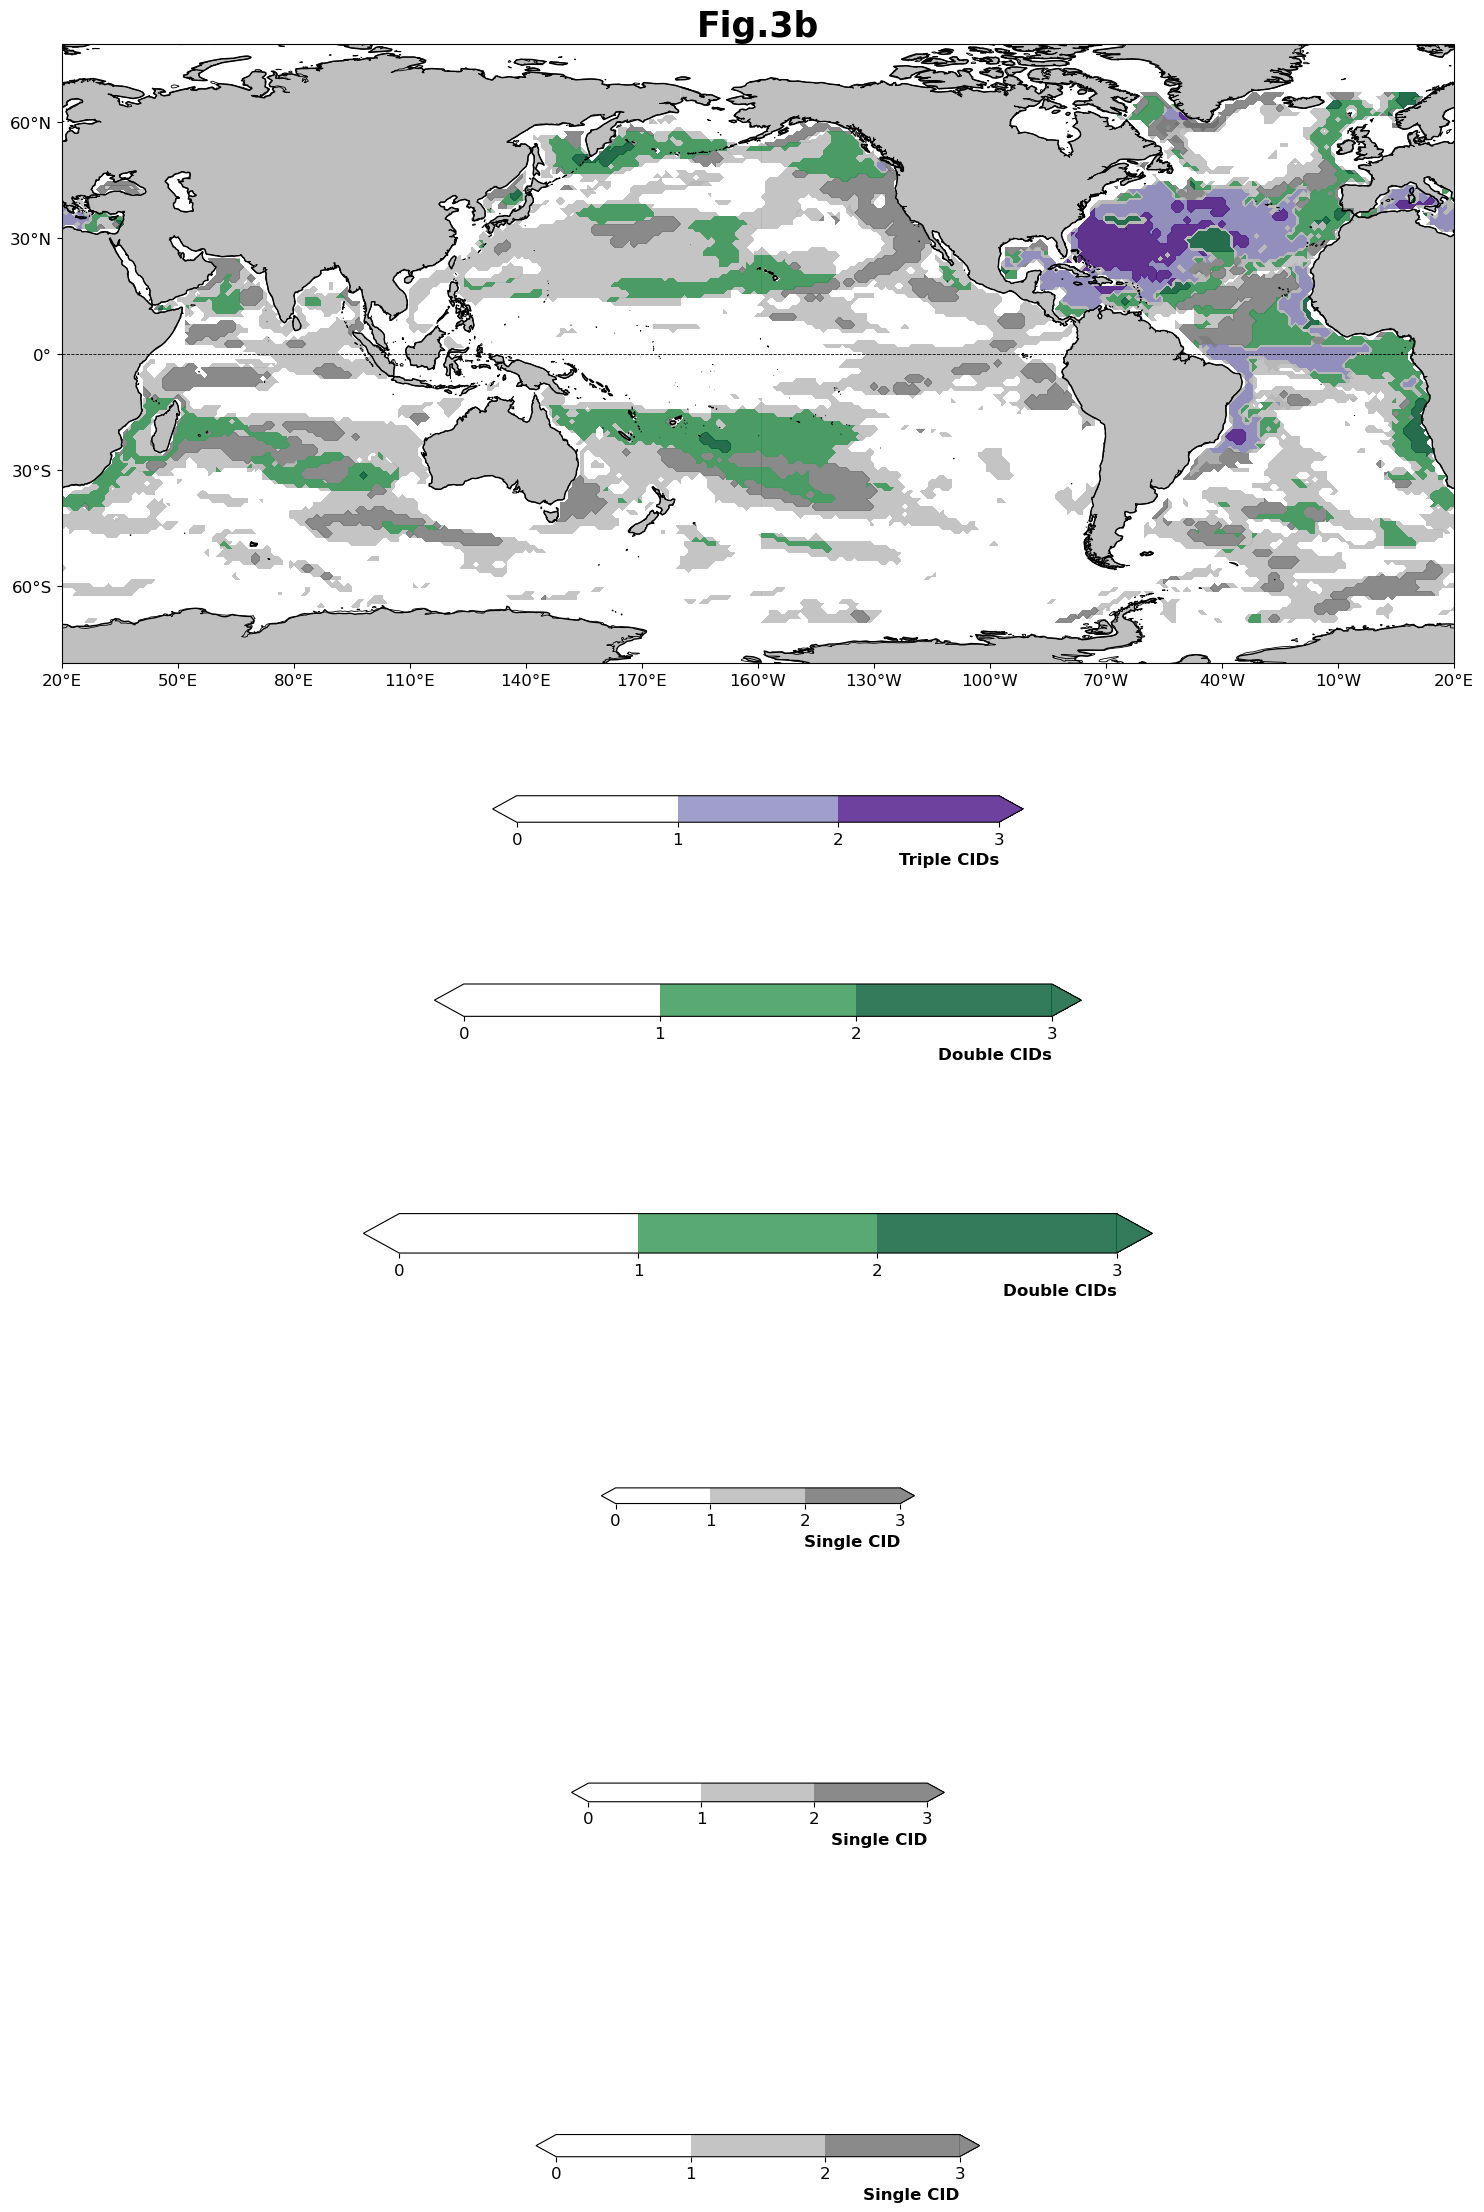

Fig.3b has been output to the /results/ folder


In [5]:
###### plot overlap
lon2d,lat2d=np.meshgrid(cycle_lon,lat)
fig=plt.figure(figsize=(15, 23))
plt.rcParams['font.size'] = '12'  
box=[-180,180,-90,90]  
scale='50m'
xstep,ystep=30,30
proj=ccrs.PlateCarree(central_longitude=200)
ax2=plt.axes(projection=proj)  
ax2.plot([-180,180],[0,0],'--',linewidth=0.6,transform=proj,color='black')
ax2.add_feature(cfeature.LAND, facecolor='0.75')
ax2.add_feature(cfeature.COASTLINE, facecolor='0.75') 
ax2.coastlines(scale,linewidth=0.6) 
ax2.set_xticks(np.arange(box[0], box[1] + xstep, xstep), crs=proj)
ax2.set_yticks(np.arange(box[2], box[3] + ystep, xstep), crs=proj)
lon_formatter = LongitudeFormatter(zero_direction_label=False) 
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter) 
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.set_extent([-180,180,-80,80],crs=proj)

#### plot contour lines
interval=np.array([0,1,2,3])
cb1=ax2.contourf(lon2d,lat2d,(exposure_T_flag),interval,cmap=new_whites,alpha=0.80,extend='both',transform=proj)   
cb2=ax2.contourf(lon2d,lat2d,(exposure_S_flag),interval,cmap=new_whites,alpha=0.80,extend='both',transform=proj)   
cb3=ax2.contourf(lon2d,lat2d,(exposure_DO_flag),interval,cmap=new_whites,alpha=0.8,extend='both',transform=proj)  
cb4=ax2.contourf(lon2d,lat2d,(exposure_T_S_flag),interval,cmap=new_dark_greens,alpha=0.8,extend='both',transform=proj)
cb5=ax2.contourf(lon2d,lat2d,(exposure_T_DO_flag),interval,cmap=new_dark_greens,alpha=0.8,extend='both',transform=proj)
cb6=ax2.contourf(lon2d,lat2d,exposure_T_S_DO_flag,interval,cmap=new_purples,alpha=0.80,extend='both',transform=proj)   

#### set colorbar
cbar1=fig.colorbar(cb1,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.01)
cbar2=fig.colorbar(cb2,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.01)
cbar3=fig.colorbar(cb3,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.01)
cbar4=fig.colorbar(cb4,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.03)
cbar5=fig.colorbar(cb5,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.03)
cbar6=fig.colorbar(cb6,ax=ax2,orientation='horizontal',shrink=0.8,fraction=0.03)
cbar1.set_label('Single CID', size=12, fontweight='bold', color='k',loc='right')
cbar2.set_label('Single CID', size=12, fontweight='bold', color='k',loc='right')
cbar3.set_label('Single CID', size=12, fontweight='bold', color='k',loc='right')
cbar4.set_label('Double CIDs', size=12, fontweight='bold', color='k',loc='right')
cbar5.set_label('Double CIDs', size=12, fontweight='bold', color='k',loc='right')
cbar6.set_label('Triple CIDs', size=12, fontweight='bold', color='k',loc='right')

plt.title('Fig.3b',fontdict={'weight':'bold','size':25})
fig.tight_layout()

plt.savefig('/results/Fig3b.pdf', dpi=750, bbox_inches='tight')
plt.show()
print('Fig.3b has been output to the /results/ folder')